In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv(r"C:\Users\kartikeshwar singh\Downloads\archive (13)\BostonHousing.csv")

In [5]:
data


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
data = data.dropna()

<Axes: >

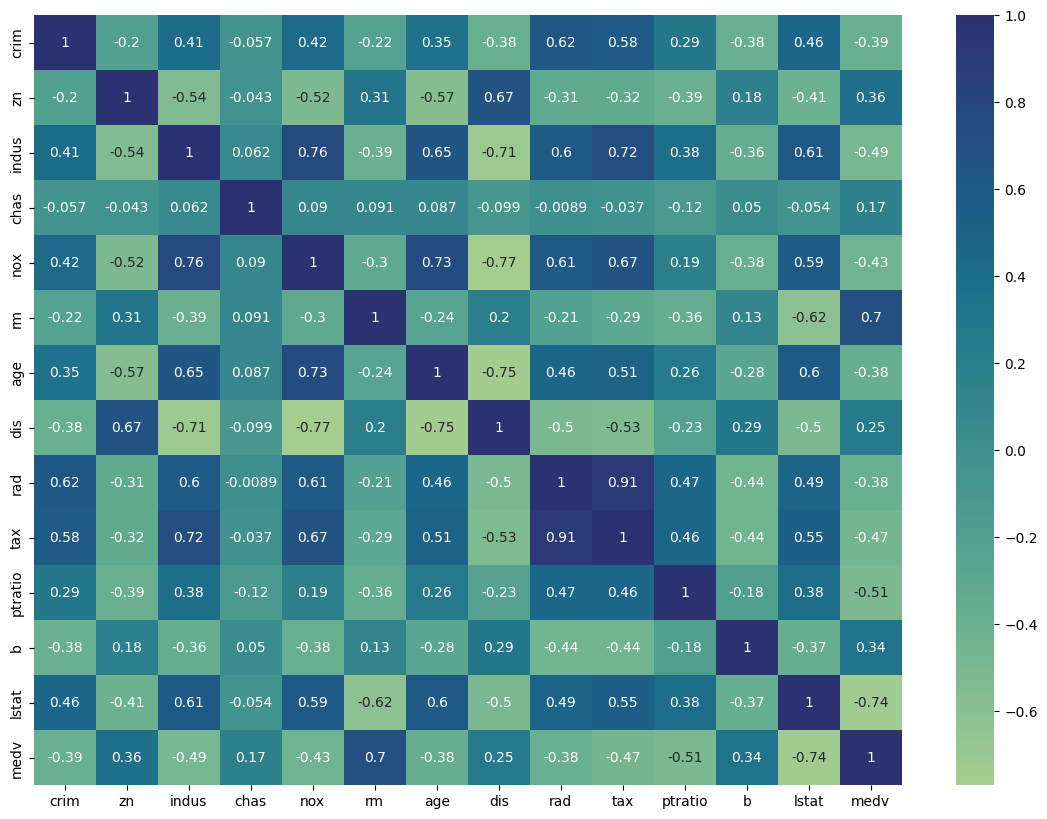

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='crest', annot=True)

C:\Users\kartikeshwar singh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


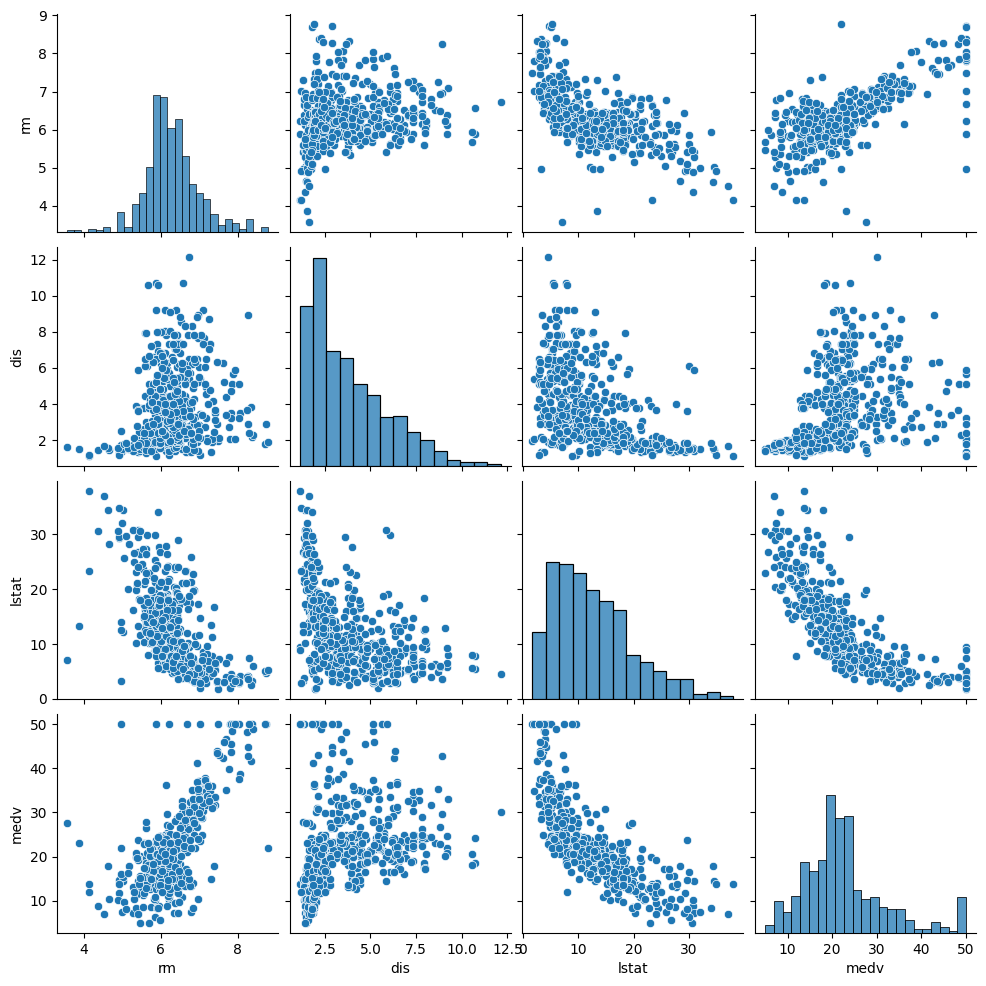

In [9]:
sns.pairplot(data[['rm', 'dis', 'lstat', 'medv']])

In [10]:
x = data[['rm','dis', 'lstat']]
y = data['medv']

In [11]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

In [12]:
scaler = StandardScaler()

In [13]:
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [14]:
model = tf.keras.models.Sequential()

In [16]:
model.add(tf.keras.layers.Input(shape=(3,)))

In [17]:
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(train_x_scaled, train_y, validation_data=(test_x_scaled, test_y), epochs=100, callbacks=[early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 571.1848 - mse: 571.1848 - val_loss: 611.1388 - val_mse: 611.1388
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 540.1259 - mse: 540.1259 - val_loss: 568.7178 - val_mse: 568.7178
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 488.8431 - mse: 488.8431 - val_loss: 483.6865 - val_mse: 483.6865
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 437.6665 - mse: 437.6665 - val_loss: 322.8309 - val_mse: 322.8309
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 270.3124 - mse: 270.3124 - val_loss: 130.3595 - val_mse: 130.3595
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 131.4173 - mse: 131.4173 - val_loss: 61.5707 - val_mse: 61.5707
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83.4192 - mse: 83.4192 - val_loss: 50.9735 - val_mse: 50.9735
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 57.7216 - mse: 57.7216 - val_loss: 36.3260 - val_mse: 36.3260
Epoch

In [20]:
model.evaluate(test_x_scaled, test_y)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9173 - mse: 11.9173


[11.50473690032959, 11.50473690032959]